# Predicting heart disease using machine learning
#This notebook looks into using various Python-based machine learning 
#and data science libraries in an attempt to build a machine learning model capable of predicting whether 
#or not someone has heart disease based on their medical attributes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\97150\\OneDrive\\Desktop\\personal\\UDEMY\\heart disease classification dataset.csv')

In [3]:
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


<AxesSubplot:xlabel='chol', ylabel='trestbps'>

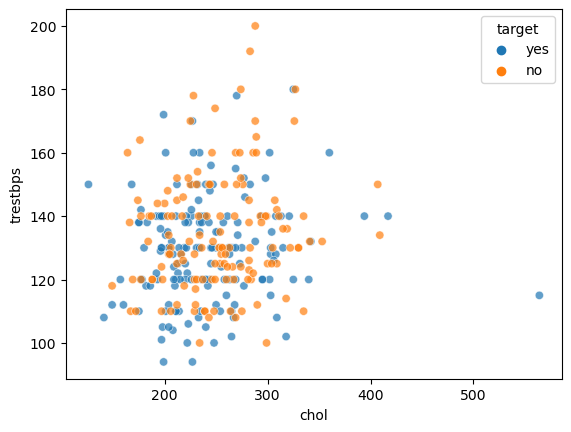

In [9]:
sns.scatterplot(y='trestbps',x='chol',data=df,alpha=0.7,hue='target')

In [18]:
df.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [271]:
# Import models from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import metrics for classification model evaluation

from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve , plot_precision_recall_curve

In [22]:
df.shape

(303, 15)

In [27]:
df['target'].unique()

array(['yes', 'no'], dtype=object)

In [28]:
mymap={'yes':1,'no':0}

In [31]:
df['target']=df['target'].map(mymap)

In [32]:
df

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,298,57,female,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,299,45,male,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,300,68,male,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,301,57,male,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0


In [34]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

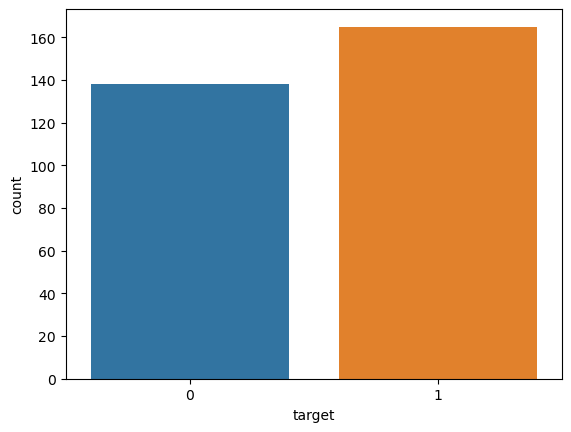

In [35]:
sns.countplot(data=df,x=df['target'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    object 
 3   cp          303 non-null    int64  
 4   trestbps    299 non-null    float64
 5   chol        302 non-null    float64
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     298 non-null    float64
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 35.6+ KB


In [38]:
df.corr()['target'].sort_values()

Unnamed: 0   -0.862585
exang        -0.436757
oldpeak      -0.430696
ca           -0.391724
thal         -0.344029
age          -0.225439
trestbps     -0.142035
chol         -0.086563
fbs          -0.028046
restecg       0.137230
slope         0.345877
thalach       0.413252
cp            0.433798
target        1.000000
Name: target, dtype: float64

In [42]:
df=df.drop('Unnamed: 0',axis=1)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  299 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   298 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 33.3+ KB


In [143]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [144]:
df[df['trestbps'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [145]:
df[df['thalach'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [56]:
df[df['chol'].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
261,52,male,0,112.0,NaN,0,1,160.0,0,0.0,2,1,2,0


In [74]:
df['chol']=df['chol'].fillna(df['chol'].mean())

In [75]:
df['trestbps']=df['trestbps'].fillna(df['trestbps'].mean())
df['thalach']=df['thalach'].fillna(df['thalach'].mean())

In [76]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [78]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.712375,17.511894,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.317881,51.822273,126.0,211.0,241.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.865772,22.376122,71.0,136.0,152.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
slope,303.0,1.399340,0.616226,0.0,1.0,1.0,2.0,2.0


In [79]:
mymapsex={'male':1,'female':0}

In [80]:
df['sex']=df['sex'].map(mymapsex)

In [81]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

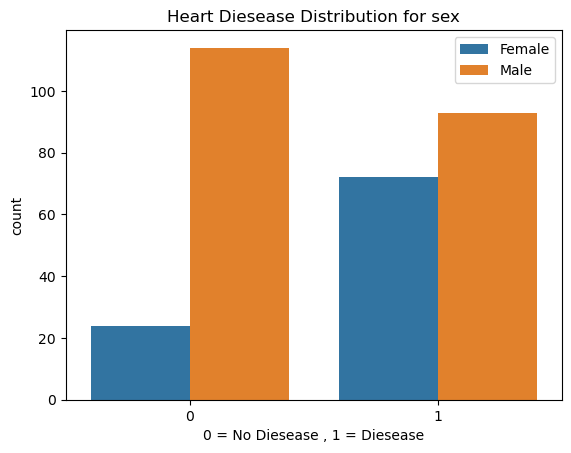

In [89]:
sns.countplot(data=df,x=df['target'],hue='sex');

plt.title('Heart Diesease Distribution for sex')
plt.xlabel('0 = No Diesease , 1 = Diesease')
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

In [83]:
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [90]:
df['thalach'].value_counts()

162.0    11
160.0     9
152.0     8
163.0     8
173.0     8
         ..
113.0     1
188.0     1
185.0     1
128.0     1
129.0     1
Name: thalach, Length: 90, dtype: int64

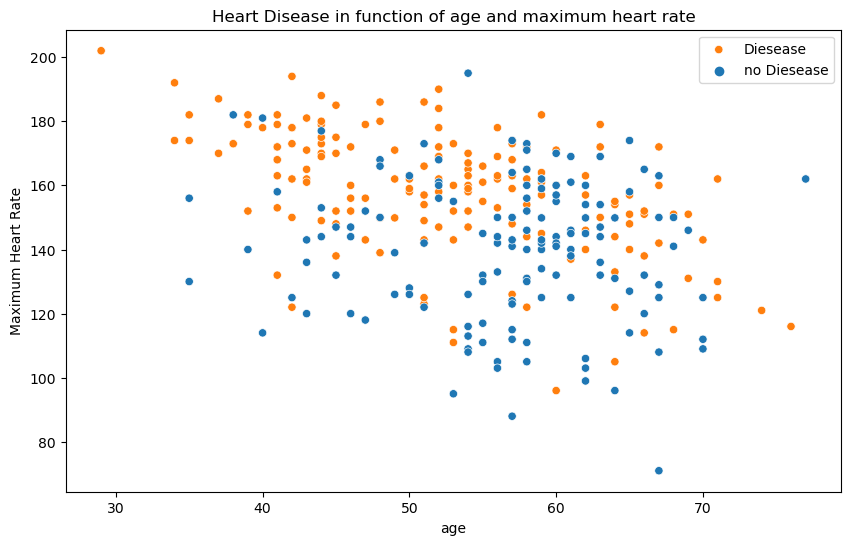

In [272]:
# Age vs MAX HEART RATE for Heart Diesease

plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='age',y='thalach',hue='target');

plt.title('Heart Disease in function of age and maximum heart rate')
plt.xlabel('age')
plt.ylabel('Maximum Heart Rate')
plt.legend(['Diesease','no Diesease'])

In [273]:
df.corr()['target'].sort_values()

exang      -0.439354
oldpeak    -0.427485
ca         -0.387693
thal       -0.359883
sex        -0.281912
age        -0.222644
trestbps   -0.135321
chol       -0.093046
fbs        -0.028406
restecg     0.131723
slope       0.342514
thalach     0.407779
cp          0.432395
target      1.000000
Name: target, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

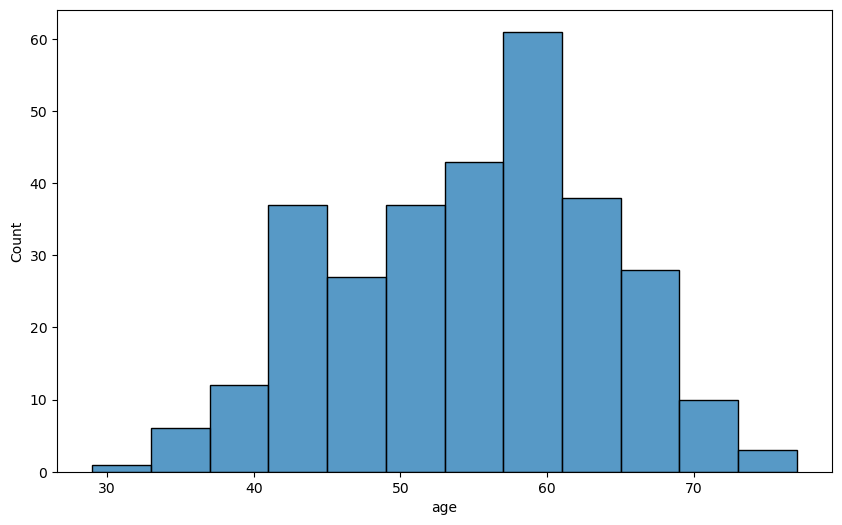

In [111]:
plt.figure(figsize=(10,6))
sns.histplot(x='age',data=df)

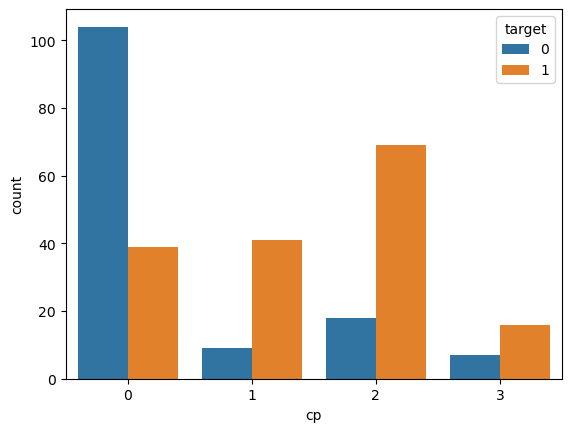

In [112]:
sns.countplot(data=df,x=df['cp'],hue='target');

In [113]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279321,0.213441,0.121308,-0.116211,-0.394370,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.063602,-0.197236,0.045032,-0.058196,-0.051004,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047841,-0.077894,0.094444,0.044421,0.299178,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279321,-0.063602,0.047841,1.000000,0.124985,0.175680,-0.110333,-0.029408,0.069590,0.193631,-0.120827,0.098237,0.060232,-0.141162
chol,0.213441,-0.197236,-0.077894,0.124985,1.000000,0.012861,-0.150129,-0.022730,0.066309,0.053027,-0.003022,0.070798,0.098285,-0.086391
fbs,0.121308,0.045032,0.094444,0.175680,0.012861,1.000000,-0.084189,0.001567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.110333,-0.150129,-0.084189,1.000000,0.037129,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.394370,-0.051004,0.299178,-0.029408,-0.022730,0.001567,0.037129,1.000000,-0.394595,-0.345398,0.378425,-0.207516,-0.105437,0.409645
exang,0.096801,0.141664,-0.394280,0.069590,0.066309,0.025665,-0.070733,-0.394595,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193631,0.053027,0.005747,-0.058770,-0.345398,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

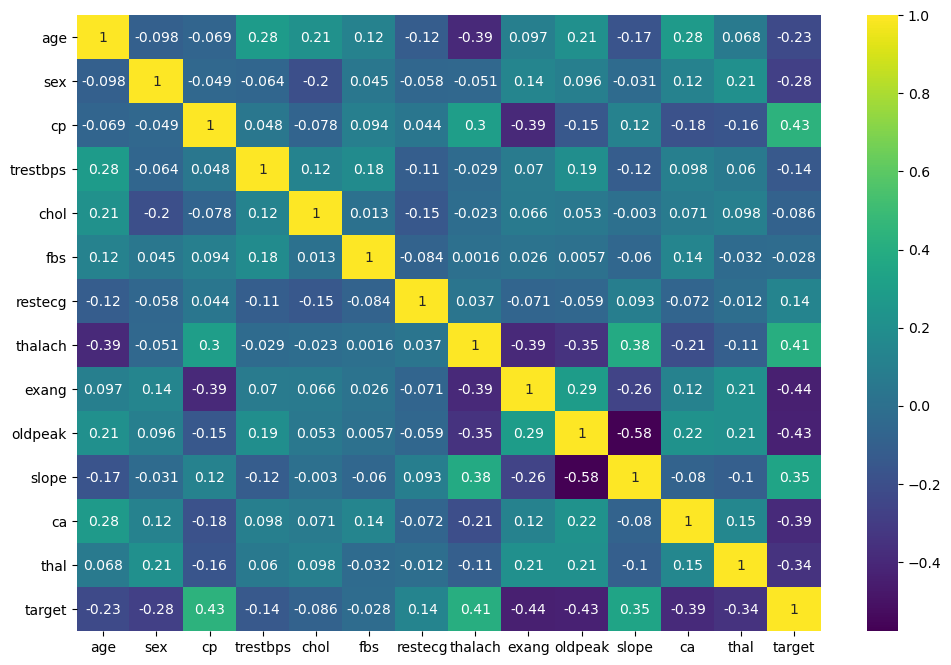

In [120]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True,)

In [146]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1


In [200]:
df.shape

(301, 14)

In [274]:
X=df.drop('target',axis=1)
y=df['target']

In [165]:
# Split data into Train and Test set

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [241]:
X_train.shape

(270, 13)

In [242]:
X_test.shape

(31, 13)

Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

Logistic Regression
K-Nearest Neighbours Classifier
Random Forest Classifier

# Logistic Regression

In [290]:


# fit the model:
log_model=LogisticRegression(max_iter=5000,solver='saga',multi_class='ovr')


In [260]:
# predict the model:
y_pred_log=log_model.predict(X_test)

### evaluate the model:


In [259]:
log_model.coef_

array([[-0.00391691, -0.31240209,  0.5455379 , -0.01429472, -0.00194704,
         0.01031469,  0.08518409,  0.02497039, -0.2567098 , -0.41390198,
         0.17358324, -0.44559701, -0.3570733 ]])

In [261]:
accuracy_score(y_test,y_pred_log)

0.8709677419354839

In [262]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.89      0.89      0.89        19

    accuracy                           0.87        31
   macro avg       0.86      0.86      0.86        31
weighted avg       0.87      0.87      0.87        31



In [214]:
confusion_matrix(y_test,y_pred_log)

array([[10,  2],
       [ 2, 17]], dtype=int64)

In [215]:
f1_score(y_test,y_pred_log)

0.8947368421052632

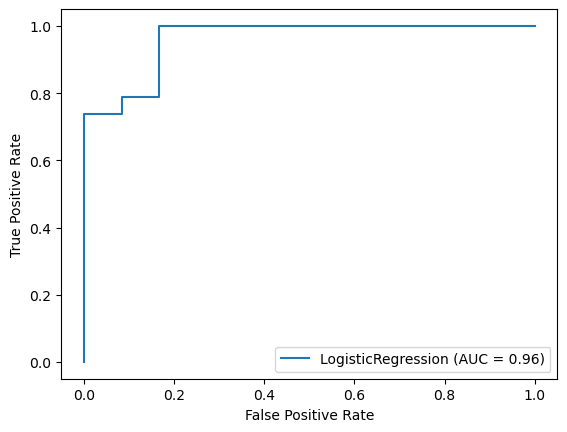

In [217]:
plot_roc_curve(log_model,X_test,y_test)

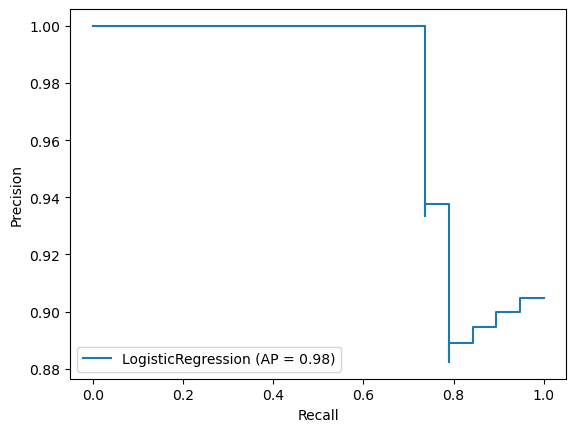

In [218]:
plot_precision_recall_curve(log_model,X_test,y_test)

# K Nearest KNeighbors Classifier


In [371]:
knn_model=KNeighborsClassifier(n_neighbors=14)

## Fit and predict the model

In [372]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [373]:
y_knn_pred=knn_model.predict(X_test)

In [374]:
accuracy_score(y_test,y_knn_pred)

0.7419354838709677

In [375]:
confusion_matrix(y_test,y_knn_pred)

array([[11,  1],
       [ 7, 12]], dtype=int64)

In [376]:
print(classification_report(y_test,y_knn_pred))

              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.92      0.63      0.75        19

    accuracy                           0.74        31
   macro avg       0.77      0.77      0.74        31
weighted avg       0.80      0.74      0.74        31



### use elbow method to get the optimum number of Neighbors 

In [363]:
test_error_rate=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    y_knn_pred=knn_model.predict(X_test)
    errors=1-accuracy_score(y_test,y_knn_pred)
    test_error_rate.append(errors)

In [364]:
test_error_rate

[0.4193548387096774,
 0.3548387096774194,
 0.3870967741935484,
 0.25806451612903225,
 0.29032258064516125,
 0.32258064516129037,
 0.32258064516129037,
 0.32258064516129037,
 0.29032258064516125,
 0.32258064516129037,
 0.29032258064516125,
 0.25806451612903225,
 0.32258064516129037,
 0.25806451612903225,
 0.29032258064516125,
 0.29032258064516125,
 0.29032258064516125,
 0.29032258064516125,
 0.25806451612903225,
 0.3548387096774194,
 0.29032258064516125,
 0.32258064516129037,
 0.29032258064516125,
 0.32258064516129037,
 0.3548387096774194,
 0.32258064516129037,
 0.25806451612903225,
 0.32258064516129037,
 0.22580645161290325]

# Random Forest Classifier model

In [384]:
rfc=RandomForestClassifier(n_estimators=100,random_state=42)

In [385]:
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [386]:
y_pred_rfc=rfc.predict(X_test)

## Evaluate the model

In [387]:
accuracy_score(y_test,y_pred_rfc)

0.9032258064516129

In [388]:
confusion_matrix(y_test,y_pred_rfc)

array([[11,  1],
       [ 2, 17]], dtype=int64)

In [389]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.94      0.89      0.92        19

    accuracy                           0.90        31
   macro avg       0.90      0.91      0.90        31
weighted avg       0.91      0.90      0.90        31



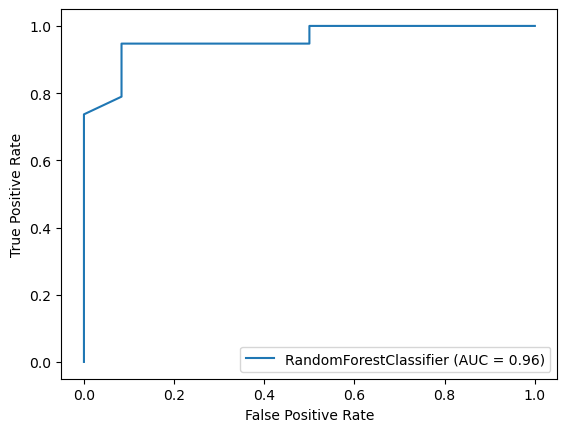

In [390]:
plot_roc_curve(rfc,X_test,y_test)

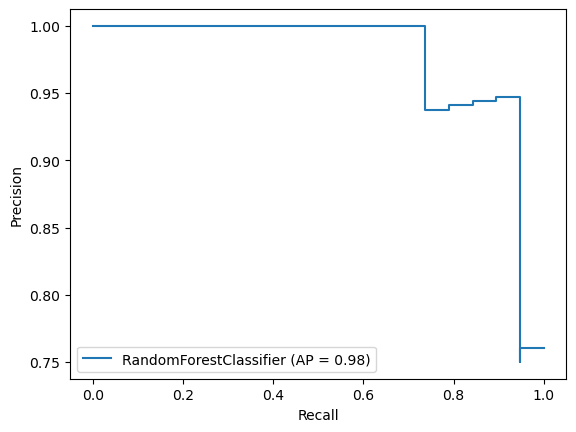

In [391]:
plot_precision_recall_curve(rfc,X_test,y_test)

In [393]:
n_estimators=[64,100,128,200]
max_features=[2,3,4]
bootstrap=[True,False]
oob_score=[True,False]

In [394]:
param_grid={'n_estimators':n_estimators,'max_features':max_features,"bootstrap":bootstrap,'oob_score':oob_score}

In [395]:
rfc_2=RandomForestClassifier()

In [396]:
grid_rfc=GridSearchCV(rfc_2,param_grid)

In [397]:
grid_rfc.fit(X_train,y_train)

C:\Users\97150\Anaconda3\envs\new_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\97150\Anaconda3\envs\new_env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\97150\Anaconda3\envs\new_env\lib\site-packages\sklearn\ensemble\_forest.py", line 351, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  FitFailedWarning)
C:\Users\97150\Anaconda3\envs\new_env\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\97150\Anaco

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [398]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 64, 'oob_score': True}

In [399]:
y_pred_rfc_2=grid_rfc.predict(X_test)

In [400]:
accuracy_score(y_test,y_pred_rfc_2)

0.9354838709677419

In [401]:
confusion_matrix(y_test,y_pred_rfc_2)

array([[12,  0],
       [ 2, 17]], dtype=int64)

In [402]:
print(classification_report(y_test,y_pred_rfc_2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        12
           1       1.00      0.89      0.94        19

    accuracy                           0.94        31
   macro avg       0.93      0.95      0.93        31
weighted avg       0.94      0.94      0.94        31



## Improved !!